In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%reload_ext autoreload
%autoreload 2

from generateEnvironment import GenerateEnvironment, GenerateConstraints, SolveProblem

np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)

In [ ]:
h_dim=2
n_reps=20
n_dim=

n_constraints
n_samples
lmbda
     

In [6]:
x_indices = np.arange(h_dim,n_dim-1)
xy_indices = np.arange(h_dim,n_dim)
constraints_indices = x_indices[:n_constraints]
connectivity_e0 = (np.random.binomial(n=10,p=0.2, size= (n_dim,n_dim))-2) * (np.ones((n_dim,n_dim))-np.eye(n_dim))
connectivity_e0[-1,:] *= np.random.binomial(n=4,p=0.05, size=n_dim)
connectivity_e0[:,-1] = 0
connectivity_e0[:h_dim,:] = 0
connectivity_e0[-1,0] = 2
covariance_e0 = np.eye(n_dim)

generate_environment = GenerateEnvironment(connectivity_e0)
constraints = GenerateConstraints(n_dim)

constraints.add_constraints_env(generate_environment.generate_intervention(n_samples, {i:'independent' for i in constraints_indices}), {i:'independent' for i in constraints_indices})

solver = SolveProblem(len(x_indices))
solver.load_constraints(constraints.array_constraints, x_indices)
solver.load_obs_dataset(generate_environment.generate_intervention(n_samples, {}))

problem = solver.solve_problem(lmbda, x_indices)
beta_DZ = problem.variables()[0].value
beta_LR = generate_environment.estimator_LR(n_samples, x_indices)
beta = connectivity_e0[-1,x_indices]
for threshold in np.array([0.05,0.1,0.2,0.5,1]):
    store_df = store_df.append(pd.Series(
        index=['n_dim','n_constraints','n_samples','lmbda','threshold','FDP_DZ','Power_DZ','L2_DZ','FDP_LR','Power_LR','L2_LR'],
        data=[n_dim,n_constraints,n_samples,lmbda,threshold,*FDP_Power_L2(beta_DZ, beta, threshold),*FDP_Power_L2(beta_LR, beta, threshold)]),
                    ignore_index=True)

In [68]:
store_df[store_df['n_dim']==100]['n_constraints'].unique()

array([19., 49., 78.])

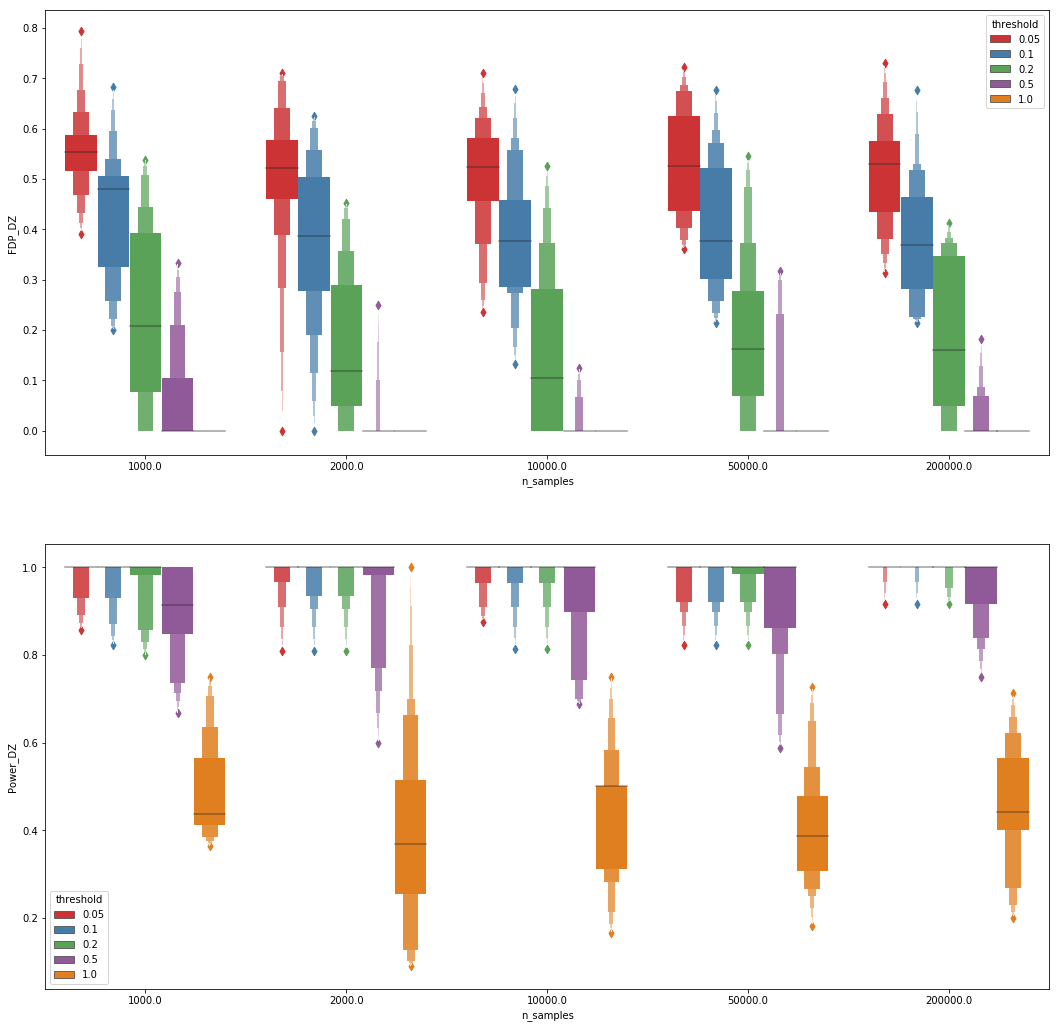

In [69]:
n_constraints=49
lmbda=1e-1
n_dim=100

fig, ax = plt.subplots(figsize=(18,18),nrows=2)

sns.boxenplot(x="n_samples", y="FDP_DZ", hue="threshold", data=store_df[(store_df['n_dim']==n_dim)
                                                                        &(store_df['n_constraints']==n_constraints)
                                                                       &(store_df['lmbda']==lmbda)], palette="Set1", ax = ax[0])

sns.boxenplot(x="n_samples", y="Power_DZ", hue="threshold", data=store_df[(store_df['n_dim']==n_dim)
                                                                        &(store_df['n_constraints']==n_constraints)
                                                                       &(store_df['lmbda']==lmbda)], palette="Set1", ax = ax[1])




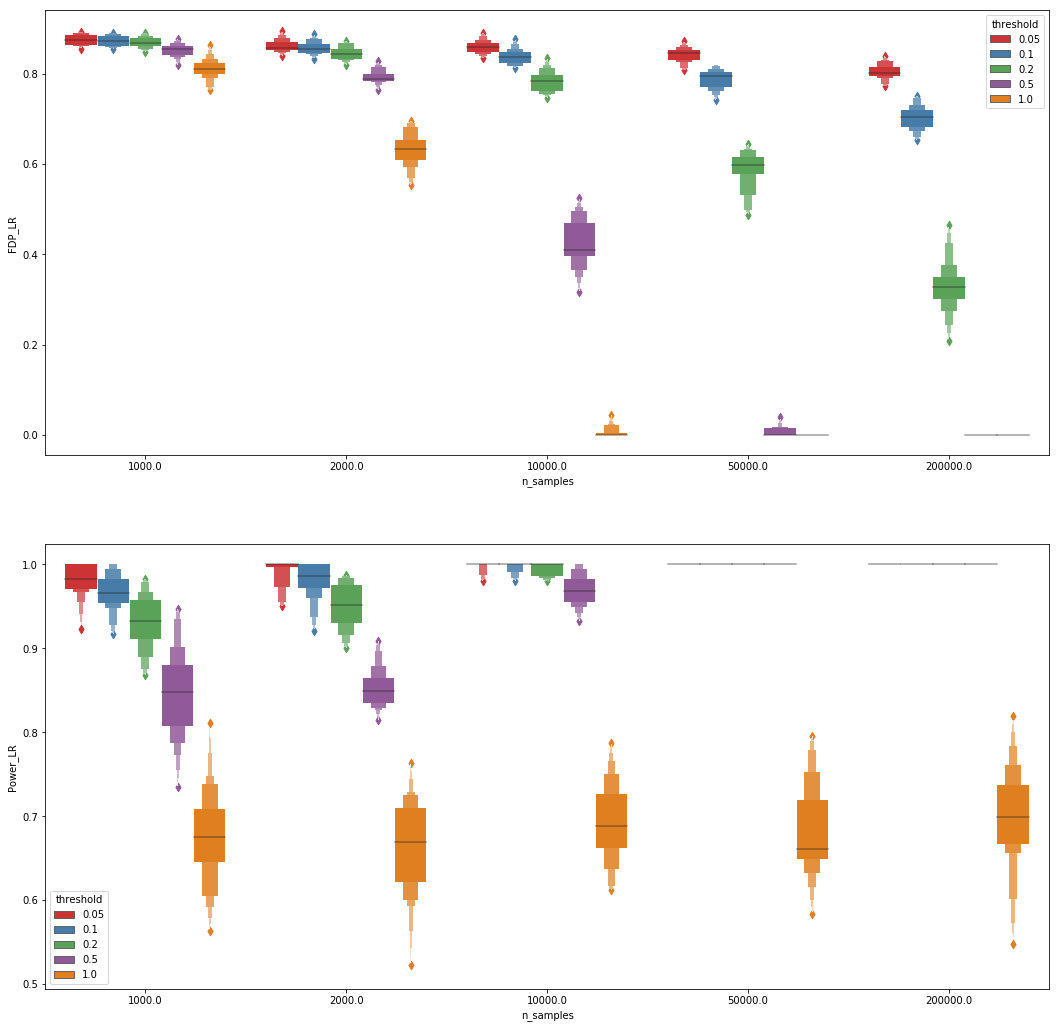

In [57]:
fig, ax = plt.subplots(figsize=(18,18),nrows=2)

sns.boxenplot(x="n_samples", y="FDP_LR", hue="threshold", data=store_df[(store_df['n_dim']==n_dim)
                                                                        &(store_df['n_constraints']==n_constraints)
                                                                       &(store_df['lmbda']==lmbda)], palette="Set1", ax = ax[0])

sns.boxenplot(x="n_samples", y="Power_LR", hue="threshold", data=store_df[(store_df['n_dim']==n_dim)
                                                                        &(store_df['n_constraints']==n_constraints)
                                                                       &(store_df['lmbda']==lmbda)], palette="Set1", ax = ax[1])




In [60]:
np.sum(np.abs(beta)>1e-3)

71

In [65]:
beta
beta_DZ

array([-0.,  0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,
        0.,  0., -0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  2.,
        0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0., -2.,
       -0.,  0., -1.,  0., -0.,  0., -0.,  0.,  2., -0.,  0., -0., -1.,
        0.,  0., -0., -0.,  0., -0.,  2.,  0.,  0., -1., -0.,  0.,  0.,
        1.,  1., -0., -0., -4., -0., -0., -0.,  0.,  0., -0.,  0.,  0.,
        0., -0., -0.,  0.,  0., -0., -0.,  0.,  0., -0., -1.,  0., -2.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
        0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,
        0., -0.,  0., -0., -1.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,
        3.,  0.,  1.,  2.,  0., -0., -0., -1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -1.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -1.,
       -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0., -0

array([ 0.   ,  0.   , -0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   , -0.   ,  0.   ,
       -0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,
        0.   ,  0.191, -0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   ,
        0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   , -0.   ,
        0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   ,
        0.   ,  0.   ,  0.   , -0.68 ,  0.   , -0.   , -0.   ,  0.   ,
        0.   , -0.   , -0.   , -0.   ,  0.085, -0.   , -0.   , -0.   ,
        0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.684,
       -0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   ,
        0.   , -0.   , -1.106, -0.   ,  0.   ,  0.   ,  0.   , -0.   ,
       -0.09 , -0.   , -0.   ,  0.   ,  0.   , -0.027, -0.   , -0.   ,
        0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   , -0.   , -0.   ,
        0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   ,
      